### Demonstration of numpy for data synthesis and manipulation
`numpy` is a numerical computing library in Python. It supports linear algebra operations that are useful in deep learning. In particular, `numpy` is useful for data loading, preparation, synthesis and manipulation. Below are some examples where `numpy` is used in vision and speech.

Note: Jupyter notebook is also supported in Visual Studio Code. In the Command Palette, type "Create New Jupyter Notenook".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate a 96x96 pixel grayscale image. Each pixel has a random value. 

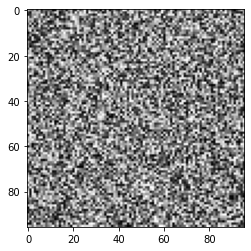

In [2]:
img = np.random.randint(0, 255, size=(96,96), dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Let's create a 4x4 chessboard pattern. Image size is stil 96x96 pixel grayscale.
First example is using loops. Not exactly efficient and scalable.

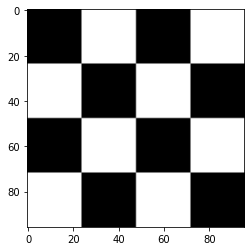

In [3]:
img = np.ones((96,96), dtype=np.uint8)*255
for i in range(4):
    img[i*24:(i+1)*24, i*24:(i+1)*24] = 0

for i in range(2,4):
    img[i*24:(i+1)*24, (i-2)*24:(i-1)*24] = 0

for i in range(0,2):
    img[i*24:(i+1)*24, (i+2)*24:(i+3)*24] = 0

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()


Second example is more efficient as the operations are parallelizable.

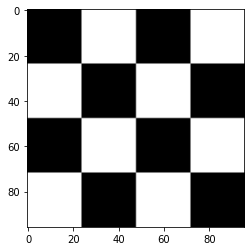

In [4]:
def chessboard(shape):
    return np.indices(shape).sum(axis=0) % 2

img = chessboard((4,4))*255
img = np.repeat(img, (24), axis=0)
img = np.repeat(img, (24), axis=1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Another example is reshaping the pattern. For example, we might want to flatten the chessboard pattern. 

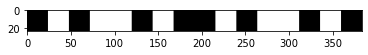

In [5]:
imgs = np.split(img, 4, axis=0)
img = np.hstack(imgs)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

With `matplotlib`, we can load an image from the filesystem into a numpy array. In this example, the image file is in the same directory as this jupyter notebook. 

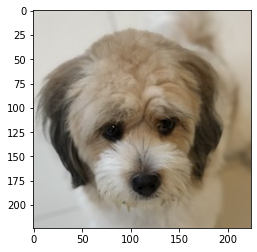

In [6]:
from matplotlib import image

img = image.imread("aki_dog.jpg")
plt.imshow(img)
plt.show()

`numpy` can perform rgb to grayscale conversion. For example, by taking the mean of the rgb components.

(224, 224)


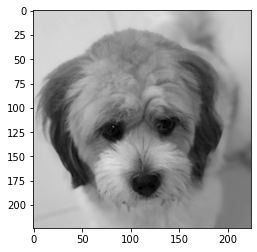

In [7]:
img = np.mean(img, axis=-1)
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

A limitation of `numpy` is it can not easily do image transformations such as shearing, rotating, etc. For that, other libraries are used such `PIL` or `torchvision`.

`numpy` can also be used to synthesize audio waveforms. For example, let us synthesize a 500Hz sine wave.

In [8]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
samples_per_sec = 22050
freq = 500
n_points = samples_per_sec*5
t = np.linspace(0,5,n_points)
data = np.sin(2*np.pi*freq*t) 
Audio(data,rate=samples_per_sec)